In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
def import_data(path=f'./data/solutions/{3515}_naive.txt'):
    m = {}
    
    with open(path) as f:
        for line in f.readlines():
            split = line.split('->')
            clean = lambda x: tuple(sorted(int(x) for x in x.strip().split(',')))
            
            parent = clean(split[0])
            child = clean(split[1])
            
            if parent not in m:
                m[parent] = set()
            
            m[parent].add(child)
    
    return m

# Raw data line count & line lengths

Stats for ./data/26.txt
	Number of lines: 26

Stats for ./data/1109.txt
	Number of lines: 1109

Stats for ./data/3515.txt
	Number of lines: 3515

Detailed stats for 79867.txt

Stats for ./data/79867.txt
	Number of lines: 79867
count    79867.000000
mean        26.518387
std          8.365816
min          1.000000
25%         23.000000
50%         29.000000
75%         32.000000
max         43.000000
dtype: float64


<AxesSubplot: ylabel='Frequency'>

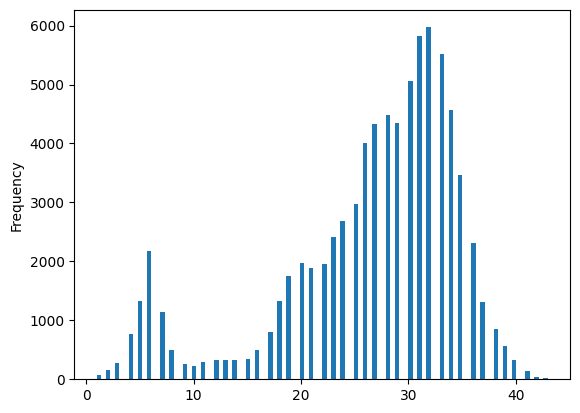

In [136]:
def stats(path):
    lineLens = []
    
    with open(path) as f:
        print('Stats for', path)
        
        lines = f.readlines()
        print(f'\tNumber of lines: {len(lines)}')
        
        # split the line by space and convert to int
        split = [tuple(int(x) for x in line.split()) for line in lines]
        # find the max line based on the length of the line
        lineLens = [len(line) for line in split]
    
    return lineLens


lineLens = []
for path in [26, 1109, 3515]:
    lineLens.extend(stats('./data/' + str(path) + '.txt'))
    print()

print('Detailed stats for 79867.txt\n')

df = pd.Series(stats('./data/79867.txt'))
print(df.describe())
df.plot.hist(bins=100)


# Increase in lengths of sets along edges

Percentage of 1-deltas: 52.75%


count    12856.000000
mean         7.322573
std          8.944443
min          1.000000
25%          1.000000
50%          1.000000
75%         14.000000
max         37.000000
dtype: float64

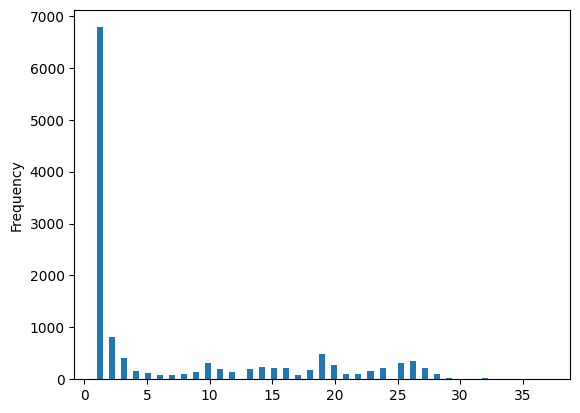

In [43]:
data = import_data()
deltas = [len(c) - len(n) for n in data for c in data[n]]
df = pd.Series(deltas)

v = (df == 1).sum() / len(df)
print(f"Percentage of 1-deltas: {v:.2%}")

df.plot.hist(bins=75)
df.describe()

# Avg children quantity

count    3187.000000
mean        4.033888
std         7.632741
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max       159.000000
dtype: float64

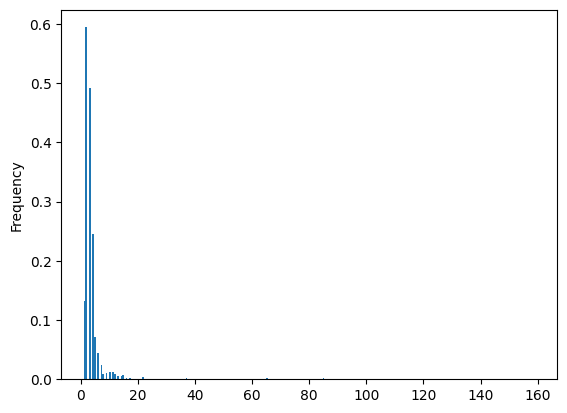

In [44]:
data = import_data()
df = pd.Series([len(data[n]) for n in data])
df.plot.hist(bins=270, density=True)
df.describe()

# Matrix representation of soln

In [88]:
def assemble_matrix(data):
    # shuffle the keys
    dataKeys = list(data.keys())
    np.random.shuffle(dataKeys)
    matrix = []

    for i in range(len(dataKeys)):
        row = []
        
        for j in range(len(dataKeys)):
            parent = dataKeys[i]
            child = dataKeys[j]
            edge = child in data[parent]
            row.append(edge)
            
        matrix.append(row)

    matrix = np.array(matrix)
    return matrix

(11, 11)


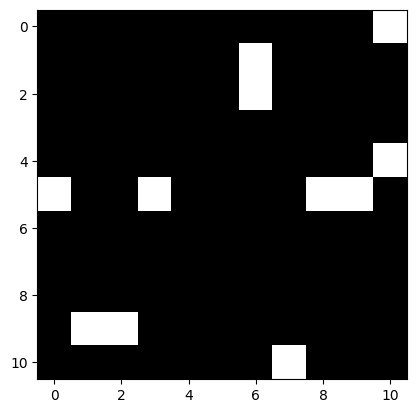

In [127]:
matrix = assemble_matrix(import_data(f'./data/solutions/{26}_naive.txt'))
print(matrix.shape)
plt.imshow(matrix, cmap='gray', interpolation='none')

(934, 934)


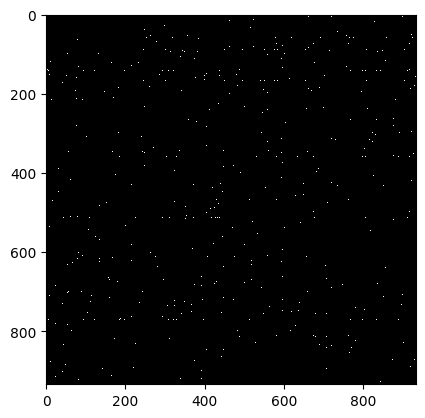

In [100]:
matrix = assemble_matrix(import_data(f'./data/solutions/{1109}_naive.txt'))
print(matrix.shape)
plt.imshow(matrix, cmap='gray', interpolation='none')

(3187, 3187)


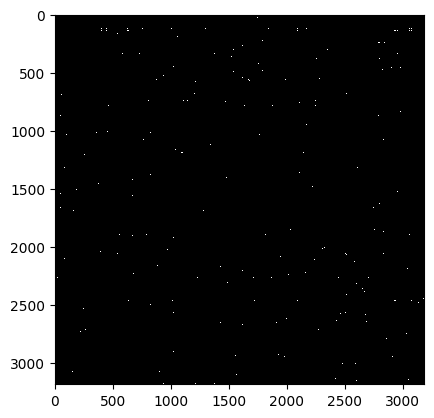

In [101]:
matrix = assemble_matrix(import_data(f'./data/solutions/{3515}_naive.txt'))
print(matrix.shape)
plt.imshow(matrix, cmap='gray', interpolation='none')

# Edge to node ratio

In [82]:
for p in [26, 1109, 3515]:
    data = import_data(f'./data/solutions/{p}_naive.txt')
    edges = sum(len(data[n]) for n in data)
    print(f"For {len(data)} nodes there are {edges} edges")

For 11 nodes there are 27 edges
For 934 nodes there are 3131 edges
For 3187 nodes there are 12856 edges


### For $n$ nodes, edges $\approx \Theta(n)$


![desmos](WH9B7t07Ha.png)